#  **Import The Useable Libraries:**

In [41]:
import numpy as np                             
import pandas as pd               
import string    
import random 
from time import time 
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from Crypto.Random import get_random_bytes
import base64
from Crypto.Util.Padding import unpad
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
from decimal import Decimal, getcontext
import scienceplots

# **Define The Global Notebook Settings:** 

In [42]:
warnings.filterwarnings("ignore") 
pd.set_option("display.max_rows" , 50) 
pd.set_option("display.max_columns" , 500) 
plt.rcParams.update({'font.size': 12})
plt.style.use(['science', 'no-latex'])
plt.rcParams['font.family'] = 'Times New Roman'

# **Define The Global Variables:** 

In [3]:
def get_random_8chars(chars_length , n_sambles): 
    random_chars= [ ] 
    for i in range(0 , n_sambles , 1): 
        letters= string.ascii_letters  
        random_chars.append("".join(random.choice(letters) for _ in range(chars_length)))
    return "".join(random_chars)  

In [130]:
texts= [ ] 
sizes= [500 , 1000 , 1500 , 2000 , 2500 , 3000 , 3500 , 4000 , 4500 , 5000 , 10000 , 20000 , 30000 , 40000 , 
        50000 , 60000 , 70000 , 80000 , 90000 , 100000]    

In [131]:
for size in sizes: 
    texts.append([get_random_8chars(10 , size)])       

In [132]:
polynomial= ([4 , 4.5 , 5 , 5.5 , 6]  , [-4 , 4 , 5 , -5.5 , -6])        

In [133]:
polynomial_degree= len(polynomial[0]) 

In [134]:
aes_key_size= 128 

In [135]:
optimized_binew_encrytion_time= [ ] 

In [136]:
optimized_binew_dencrytion_time= [ ]

In [137]:
aes_encrytion_time= [ ] 

In [138]:
aes_dencrytion_time= [ ]

In [139]:
optimized_binew_total_time= [ ]

In [140]:
aes_total_time= [ ] 

# **Define The Global Classes:** 

In [16]:
Sbox = [
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
]
mix_column_matrix = [
    [0x02, 0x03, 0x01, 0x01],
    [0x01, 0x02, 0x03, 0x01],
    [0x01, 0x01, 0x02, 0x03],
    [0x03, 0x01, 0x01, 0x02]
]
Rcon = [
    0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1B, 0x36,
    0x6C, 0xD8, 0xAB, 0x4D, 0x9A, 0x2F, 0x5E, 0xBC, 0x63, 0xC6
]

def sub_bytes(state):
    return [Sbox[b] for b in state]
def shift_rows(state):
    return [
        state[0], state[5], state[10], state[15],
        state[4], state[9], state[14], state[3],
        state[8], state[13], state[2], state[7],
        state[12], state[1], state[6], state[11]
    ]
def mix_columns(state):
    result = [0] * 16
    for i in range(4):
        for j in range(4):
            result[i + j * 4] = (
                mix_column_matrix[0][i] * state[j * 4] +
                mix_column_matrix[1][i] * state[1 + j * 4] +
                mix_column_matrix[2][i] * state[2 + j * 4] +
                mix_column_matrix[3][i] * state[3 + j * 4]
            ) % 256
    return result
def add_round_key(state, round_key):
    return [(b1 ^ b2) for b1, b2 in zip(state, round_key)]
def key_expansion(key):
    key_schedule = [b for b in key]
    for i in range(16, 176, 4):
        temp = key_schedule[i-4:i]
        if i % 16 == 0:
            temp = sub_bytes(rot_word(temp)) + [Rcon[i//16 - 1], 0, 0, 0]
        key_schedule.extend([a ^ b for a, b in zip(temp, key_schedule[i-16:i])])
    return key_schedule
def rot_word(word):
    return word[1:] + [word[0]]
def sub_word(word):
    return [Sbox[b] for b in word]
def aes_encrypt_block(block, key):
    round_keys = key_expansion(key)
    state = add_round_key(block, round_keys[:16])
    for round_num in range(1, 10):
        state = sub_bytes(state)
        state = shift_rows(state)
        state = mix_columns(state)
        round_key = round_keys[round_num * 16:(round_num + 1) * 16]
        state = add_round_key(state, round_key)
    state = sub_bytes(state)
    state = shift_rows(state)
    state = add_round_key(state, round_keys[160:])
    return state
def aes_encrypt(plaintext, key):
    if len(plaintext) % 16 != 0:
        raise ValueError("Input plaintext must be a multiple of 16 bytes (128 bits)")
    key_exp = key_expansion(key)
    ciphertext = b""
    for i in range(0, len(plaintext), 16):
        block = bytes(aes_encrypt_block(plaintext[i:i+16], key_exp))
        ciphertext += block
    return ciphertext
def inv_sub_bytes(state):
    return [Sbox.index(b) for b in state]
def inv_shift_rows(state):
    return [
        state[0], state[13], state[10], state[7],
        state[4], state[1], state[14], state[11],
        state[8], state[5], state[2], state[15],
        state[12], state[9], state[6], state[3]
    ]
def inv_mix_columns(state):
    return mix_columns(state)
def aes_decrypt_block(block, key):
    round_keys = key_expansion(key)
    state = add_round_key(block, round_keys[10 * 16:])
    state = inv_shift_rows(state)
    state = inv_sub_bytes(state)
    for round_num in range(9, 0, -1):
        state = add_round_key(state, round_keys[round_num * 16:(round_num + 1) * 16])
        state = inv_mix_columns(state)
        state = inv_shift_rows(state)
        state = inv_sub_bytes(state)
    state = add_round_key(state, round_keys[:16])
    return state
def aes_decrypt(ciphertext, key):
    if len(ciphertext) % 16 != 0:
        raise ValueError("Input ciphertext must be a multiple of 16 bytes (128 bits)")
    key_exp = key_expansion(key)
    decrypted_text = b""
    for i in range(0, len(ciphertext), 16):
        block = bytes(aes_decrypt_block(ciphertext[i:i+16], key_exp))
        decrypted_text += block
    return decrypted_text
def pkcs7_pad(data):
    pad_len = 16 - (len(data) % 16)
    return data + bytes([pad_len] * pad_len)
def pkcs7_unpad(data):
    pad_len = data[-1]
    return data[:-pad_len] 

In [80]:
class BiNew(object):
    def __init__(self, text, x, y):
        if type(text) != str or len(x) != len(y):
            raise ValueError("Invalid parameters passed")
        self.text = text
        self.len_text = len(text)
        self.x = [Decimal(i) for i in x]
        self.y = [Decimal(i) for i in y]
        self.coefs = None
        self.maximium_8utf_chars = Decimal(597351581456640298090110)    
        self.minimum_8utf_chars = Decimal(151708338147718170943520)
        self.len_x = len(x)
    def set_text(self, text):
        if type(text) != str:
            raise ValueError("Invalid text type passed")
        self.text = text

    def set_x_y(self, x, y):
        if len(x) != len(y):
            raise ValueError("Invalid x, y points size passed")
        self.x = [Decimal(i) for i in x]
        self.y = [Decimal(i) for i in y]
        self.len_x = len(x)
        self.coefs = None

    def encode_and_get_int_values(self, chunk):
        byte_representation = chunk.encode('utf-8')
        integer_representation = int.from_bytes(
            byte_representation, byteorder='big')
        return integer_representation

    def get_normalized_value(self, integer_value):
        decimal_value = Decimal(integer_value)
        normalized_value = (decimal_value - self.minimum_8utf_chars) / \
            (self.maximium_8utf_chars - self.minimum_8utf_chars)
        return normalized_value

    def get_inverse_normalized_value(self, normalized_value):
        integer_value = (normalized_value *
                         (self.maximium_8utf_chars - self.minimum_8utf_chars)) + self.minimum_8utf_chars
        return integer_value

    def get_normalized_values(self):
        normalized_values = []
        chunks = self.len_text // 10
        beg, end = 0, 0
        if chunks:
            end = 10
            for i in range(0, chunks, 1):
                chunk = self.text[beg: end]
                normalized_values.append(
                    self.get_normalized_value(self.encode_and_get_int_values(chunk)))
                beg = end
                end = beg + 10
        if (self.len_text / 10) % 1 != 0:     
            chunk = self.text[end:]
            normalized_values.append( 
                self.get_normalized_value(self.encode_and_get_int_values(chunk)))
        return normalized_values     

    def get_interger_values(self, normalized_values):
        interger_values = []
        for normalized_value in normalized_values:
            interger_values.append(
                self.get_inverse_normalized_value(normalized_value))
        return interger_values     

    def decode_and_get_strings(self, int_values):
        strings = []
        for int_value in int_values:
            int_value = np.ceil(int_value)
            byte_representation = int_value.to_bytes(
                (int_value.bit_length() + 7) // 8, byteorder='big')
            text = byte_representation.decode('utf-8')
            strings.append(text)
        return "".join(strings)
    def decode_and_get_string(self , int_value): 
        int_value = np.ceil(int_value)
        byte_representation = int_value.to_bytes(
            (int_value.bit_length() + 7) // 8, byteorder='big')
        return(byte_representation.decode('utf-8'))         

    def newton_forward_coefficients(self):
        n = len(self.x)
        coefficients = np.zeros(n, dtype=Decimal)
        for i in range(n):
            coefficients[i] = Decimal(self.y[i])
        for j in range(1, n):
            for i in range(n - 1, j - 1, -1):
                coefficients[i] = (coefficients[i] - coefficients[i - 1]) / \
                  (self.x[i] - self.x[i - j])
        self.coefs = coefficients 
    
    def evaluate_interpolated_value(self, target , normalized_value= Decimal(0)):    
        n = self.len_x
        result = Decimal(self.coefs[-1]) 
        for i in range(n - 2, -1, -1):
            result = Decimal(result) * \
                (Decimal(target) - Decimal(self.x[i])) + Decimal(self.coefs[i])
        return result - normalized_value 

    def bisection_method(self, a, b, normalized_value, tol=Decimal(10 ** -38)):  
        if self.evaluate_interpolated_value(a, normalized_value) * self.evaluate_interpolated_value(b, normalized_value) > 0:
            raise ValueError("The function values at the endpoints must have different signs.")
        for i in range(40):
            midpoint = (a + b) / Decimal(2)
            if self.evaluate_interpolated_value(midpoint, normalized_value) == Decimal(0):
                return midpoint
            elif self.evaluate_interpolated_value(midpoint, normalized_value) * self.evaluate_interpolated_value(a, normalized_value) < 0:
                b = midpoint
            else:
                a = midpoint 
        return midpoint  
  
    def find_roots_secant(self, x0, x1, normalized_value, tol=Decimal(10 ** -17), max_iter=16):
        x_prev = Decimal(x0)
        x_curr = Decimal(x1)
        for i in range(max_iter):
            fx_prev = self.evaluate_interpolated_value(x_prev, normalized_value)
            fx_curr = self.evaluate_interpolated_value(x_curr, normalized_value)
            if fx_curr - fx_prev == 0:
                raise ValueError("Secant method cannot converge. Division by zero.")
            x_next = x_curr - fx_curr * (x_curr - x_prev) / (fx_curr - fx_prev)
            x_prev = x_curr
            x_curr = x_next
            if abs(fx_curr) < tol:
                return x_curr
        return x_curr   
    
    def find_roots_false_position(self, a, b, normalized_value, tol=Decimal(10 ** -17), max_iter=21):
        if self.evaluate_interpolated_value(a, normalized_value) * self.evaluate_interpolated_value(b, normalized_value) > 0:
            raise ValueError("The function values at the endpoints must have different signs.")
        for i in range(max_iter):
            fa = self.evaluate_interpolated_value(a, normalized_value)
            fb = self.evaluate_interpolated_value(b, normalized_value)
            if fa == Decimal(0):
                return a
            if fb == Decimal(0):
                return b
            x_next = (a * fb - b * fa) / (fb - fa)
            fx_next = self.evaluate_interpolated_value(x_next, normalized_value)
            if abs(fx_next) < tol:
                return x_next
            if fx_next * fa < 0:
                b = x_next
            else:
                a = x_next
        return (a + b) / Decimal(2)
 
    def encryption(self):  
        cipher_text = []
        self.newton_forward_coefficients()  
        normalized_values = self.get_normalized_values()
        for normalized_value in normalized_values:
            cipher_text.append(self.find_roots_secant(self.x[0], self.x[-1] , normalized_value)) # Secant      
        return cipher_text   
    def dencryption(self , cipher_text): 
        text= [ ] 
        for root in cipher_text: 
            norm= self.evaluate_interpolated_value(root)   
            inverse= self.get_inverse_normalized_value(norm) 
            text.append(self.decode_and_get_string(Decimal(round(inverse))))  
        return "".join(text)          

# **Get The Encryption & Dencrytion & Total Times For Bisection , Secant Hyprid With Differrent Polynomials Degree 2 : 6**

In [25]:
polynomials= [
    ([2 , 2.5 , 3]                                                  , [2 , -2 , -3]) ,   
    ([3 , 3.5 , 4 , 4.5]                                            , [3 , 3 , -4 , -4.5]) ,    
    ([4 , 4.5 , 5 , 5.5 , 6]                                        , [4 , 4 , 5 , -5.5 , -6]) ,    
    ([5 , 5.5 , 6 , 6.5 , 7 , 7.5]                                  , [5 , 5 , 6 , -6.5 , -7 , -7.5]) ,    
    ([6 , 6.5 , 7 , 7.5 , 8 , 8.5 , 9]                              , [6 , 6 , 7 , 7.5 , -8 , -8.5 , -9]) ,         
] 

In [56]:
Degrees= [ ] 
for poly in polynomials:
    Degrees.append(len(poly[0]) - 1) 

In [57]:
texts_diff= [ ] 
sizes_diff= [500 , 1000 , 1500 , 2000 , 2500]      
for size in sizes_diff: 
    texts_diff.append([get_random_8chars(4 , size)])   

In [58]:
bisection_different_sizes_degrees_encrytpion= [ ]  
bisection_different_sizes_degrees_dencryption= [ ]  
bisection_different_sizes_degrees_total= [ ]   

In [59]:
fposition_different_sizes_degrees_encrytpion= [ ]  
fposition_different_sizes_degrees_dencryption= [ ]  
fposition_different_sizes_degrees_total= [ ]  

In [60]:
secant_different_sizes_degrees_encrytpion= [ ]  
secant_different_sizes_degrees_dencryption= [ ]  
secant_different_sizes_degrees_total= [ ]   

### **Get Encryption , Dencryption , Total Times When Using Bisction:** 

In [61]:
for text , poly in zip(texts_diff , polynomials):
    print(poly)
    obj= BiNew(text[0] , poly[0] , poly[1]) 
    binew_en_beg= time() 
    ciper_text= obj.encryption()  
    binew_en_end= time() 
    en_time= binew_en_end - binew_en_beg
    bisection_different_sizes_degrees_encrytpion.append(en_time) 
    
    binew_den_beg= time() 
    text_dencryption= obj.dencryption(ciper_text)   
    binew_den_end= time()  
    den_time= binew_den_end - binew_den_beg
    bisection_different_sizes_degrees_dencryption.append(den_time)  
    
    bisection_different_sizes_degrees_total.append(en_time + den_time) 
    print(text_dencryption == text[0])  

([2, 2.5, 3], [2, -2, -3])
True
([3, 3.5, 4, 4.5], [3, 3, -4, -4.5])
True
([4, 4.5, 5, 5.5, 6], [4, 4, 5, -5.5, -6])
True
([5, 5.5, 6, 6.5, 7, 7.5], [5, 5, 6, -6.5, -7, -7.5])
True
([6, 6.5, 7, 7.5, 8, 8.5, 9], [6, 6, 7, 7.5, -8, -8.5, -9])
True


### **Get Encryption , Dencryption , Total Times When Using False Position:** 

In [63]:
for text , poly in zip(texts_diff , polynomials):
    print(poly)
    obj= BiNew(text[0] , poly[0] , poly[1]) 
    binew_en_beg= time() 
    ciper_text= obj.encryption()  
    binew_en_end= time() 
    en_time= binew_en_end - binew_en_beg
    fposition_different_sizes_degrees_encrytpion.append(en_time) 
    
    binew_den_beg= time() 
    text_dencryption= obj.dencryption(ciper_text)   
    binew_den_end= time()  
    den_time= binew_den_end - binew_den_beg
    fposition_different_sizes_degrees_dencryption.append(den_time)  
    
    fposition_different_sizes_degrees_total.append(en_time + den_time) 
    print(text_dencryption == text[0])  

([2, 2.5, 3], [2, -2, -3])
True
([3, 3.5, 4, 4.5], [3, 3, -4, -4.5])
True
([4, 4.5, 5, 5.5, 6], [4, 4, 5, -5.5, -6])
True
([5, 5.5, 6, 6.5, 7, 7.5], [5, 5, 6, -6.5, -7, -7.5])
True
([6, 6.5, 7, 7.5, 8, 8.5, 9], [6, 6, 7, 7.5, -8, -8.5, -9])
True


### **Get Encryption , Dencryption , Total Times When Using Secant:** 

In [65]:
for text , poly in zip(texts_diff , polynomials):
    print(poly)
    obj= BiNew(text[0] , poly[0] , poly[1]) 
    binew_en_beg= time() 
    ciper_text= obj.encryption()  
    binew_en_end= time() 
    en_time= binew_en_end - binew_en_beg
    secant_different_sizes_degrees_encrytpion.append(en_time) 
    
    binew_den_beg= time() 
    text_dencryption= obj.dencryption(ciper_text)   
    binew_den_end= time()  
    den_time= binew_den_end - binew_den_beg
    secant_different_sizes_degrees_dencryption.append(den_time)  
    
    secant_different_sizes_degrees_total.append(en_time + den_time) 
    print(text_dencryption == text[0])  

([2, 2.5, 3], [2, -2, -3])
True
([3, 3.5, 4, 4.5], [3, 3, -4, -4.5])
True
([4, 4.5, 5, 5.5, 6], [4, 4, 5, -5.5, -6])
True
([5, 5.5, 6, 6.5, 7, 7.5], [5, 5, 6, -6.5, -7, -7.5])
True
([6, 6.5, 7, 7.5, 8, 8.5, 9], [6, 6, 7, 7.5, -8, -8.5, -9])
True


### **Record The Results Of Encrytion , Dencryption Total Times When Using Bisection , Secant , Hyprid For Differrent Sizes , Poly Degrees**

In [66]:
bisection_secant_differrent_sizes_degress= pd.DataFrame() 

In [67]:
encrytion_times= [ ] 
for bisection_en_time , secant_en_time , fpo_en_time in zip(bisection_different_sizes_degrees_encrytpion , 
                                              secant_different_sizes_degrees_encrytpion , 
                                              fposition_different_sizes_degrees_encrytpion):
    encrytion_times.extend([bisection_en_time , fpo_en_time , secant_en_time])

In [68]:
dencrytion_times= [ ]
for bisection_den_time , secant_den_time , fpo_den_time in zip(bisection_different_sizes_degrees_dencryption , 
                                              secant_different_sizes_degrees_dencryption , 
                                               fposition_different_sizes_degrees_dencryption):  
    dencrytion_times.extend([bisection_den_time , fpo_den_time , secant_den_time])

In [69]:
total_times= [ ]
names= [ ]
for bisection_total_time , secant_total_time , fpo_total_time in zip(bisection_different_sizes_degrees_total , 
                                              secant_different_sizes_degrees_total , 
                                              fposition_different_sizes_degrees_total):  
    total_times.extend([bisection_total_time , fpo_total_time , secant_total_time])
    names.extend(["Biscetion" , "False Position" , "Secant"]) 

In [70]:
Polys_Degrees= [ ]
for degree in Degrees: 
    Polys_Degrees.extend([degree , degree , degree])

In [71]:
file_sizes= [ ]
for size in sizes_diff:
    file_sizes.extend([size , size , size]) 

In [72]:
bisection_secant_differrent_sizes_degress["Root Finding Algorithm"]= names
bisection_secant_differrent_sizes_degress["File Size In Bytes"]= [4 * i for i in file_sizes] 
bisection_secant_differrent_sizes_degress["Polynomial Degree"]= Polys_Degrees 
bisection_secant_differrent_sizes_degress["Encrytion Time"]= encrytion_times 
bisection_secant_differrent_sizes_degress["Decrytion Time"]= dencrytion_times 
bisection_secant_differrent_sizes_degress["Total Time"]= total_times 

In [73]:
bisection_secant_differrent_sizes_degress     

,Root Finding Algorithm,File Size In Bytes,Polynomial Degree,Encrytion Time,Decrytion Time,Total Time
0,Biscetion,2000,2,0.422333,0.012990,0.435323
1,False Position,2000,2,0.214172,0.015989,0.230161
2,Secant,2000,2,0.094456,0.012991,0.107448
3,Biscetion,4000,3,1.001050,0.028494,1.029544
4,False Position,4000,3,0.366459,0.029980,0.396439
5,Secant,4000,3,0.159176,0.034977,0.194154
6,Biscetion,6000,4,1.829269,0.049836,1.879105
7,False Position,6000,4,0.723044,0.044973,0.768017
8,Secant,6000,4,0.328648,0.045970,0.374619
9,Biscetion,8000,5,2.907735,0.064741,2.972476


In [74]:
bisection_secant_differrent_sizes_degress.to_csv(r"D:/مشروع التخرج/BiNew/Results/bisection_secant_differrent_sizes_degress.csv") 

### **Plot The Results:** 

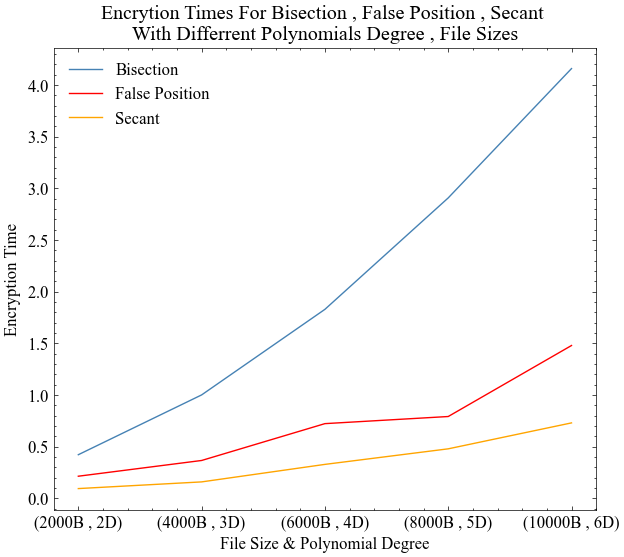

In [173]:
plt.figure(figsize= (7 , 6)) 
plt.plot(sizes_diff , bisection_different_sizes_degrees_encrytpion , color= "steelblue" , label= "Bisection") 
plt.plot(sizes_diff , fposition_different_sizes_degrees_encrytpion , color= "red" , label= "False Position") 
plt.plot(sizes_diff , secant_different_sizes_degrees_encrytpion , color= "orange" , label= "Secant")  
plt.xticks(sizes_diff, [f"({4 * size}B , {degree}D)" for size , degree in zip(sizes_diff,Degrees)]) 
plt.xlabel("File Size & Polynomial Degree") 
plt.ylabel("Encryption Time") 
plt.title("Encrytion Times For Bisection , False Position , Secant \nWith Differrent Polynomials Degree , File Sizes") 
plt.legend() 
plt.savefig(r"D:/مشروع التخرج/BiNew/Results/bisection_secant_differrent_sizes_degress_en.svg" , format= "svg")  
plt.show() 

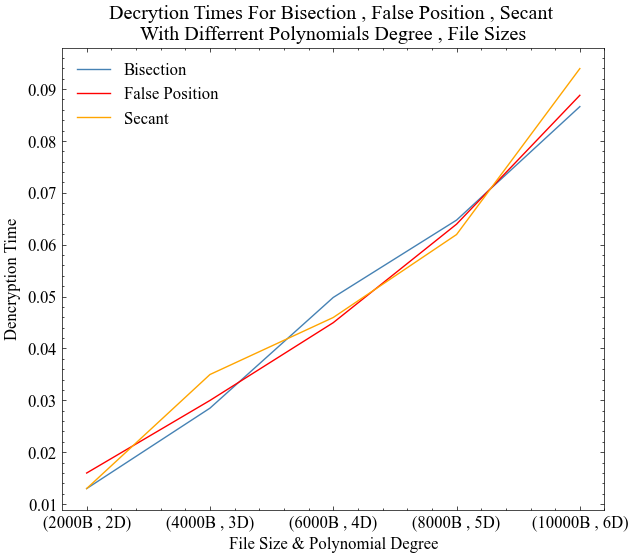

In [174]:
plt.figure(figsize= (7 , 6)) 
plt.plot(sizes_diff , bisection_different_sizes_degrees_dencryption , color= "steelblue" , label= "Bisection") 
plt.plot(sizes_diff , fposition_different_sizes_degrees_dencryption , color= "red" , label= "False Position") 
plt.plot(sizes_diff , secant_different_sizes_degrees_dencryption , color= "orange" , label= "Secant")  
plt.xticks(sizes_diff, [f"({4 * size}B , {degree}D)" for size , degree in zip(sizes_diff,Degrees)]) 
plt.xlabel("File Size & Polynomial Degree") 
plt.ylabel("Dencryption Time") 
plt.title("Decrytion Times For Bisection , False Position , Secant \nWith Differrent Polynomials Degree , File Sizes") 
plt.legend()
plt.savefig(r"D:/مشروع التخرج/BiNew/Results/bisection_secant_differrent_sizes_degress_den.svg" , format= "svg")   
plt.show()  

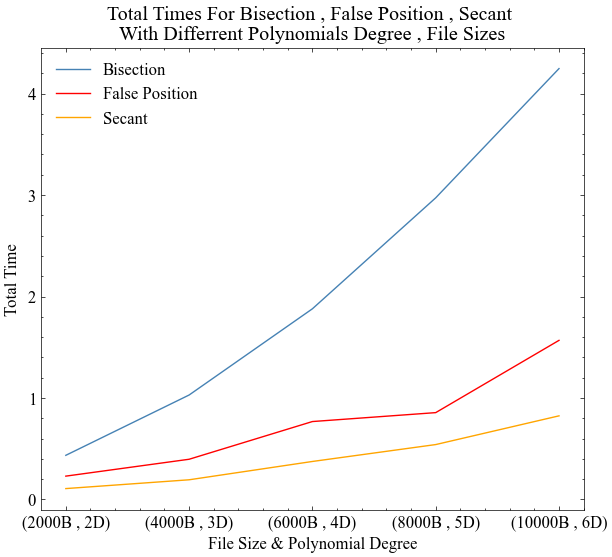

In [175]:
plt.figure(figsize= (7 , 6)) 
plt.plot(sizes_diff , bisection_different_sizes_degrees_total , color= "steelblue" , label= "Bisection") 
plt.plot(sizes_diff , fposition_different_sizes_degrees_total , color= "red" , label= "False Position")  
plt.plot(sizes_diff , secant_different_sizes_degrees_total , color= "orange" , label= "Secant")  
plt.xticks(sizes_diff, [f"({4 * size}B , {degree}D)" for size , degree in zip(sizes_diff,Degrees)]) 
plt.xlabel("File Size & Polynomial Degree") 
plt.ylabel("Total Time") 
plt.title("Total Times For Bisection , False Position , Secant \nWith Differrent Polynomials Degree , File Sizes") 
plt.legend() 
plt.savefig(r"D:/مشروع التخرج/BiNew/Results/bisection_secant_differrent_sizes_degress_total.svg" , format= "svg")  
plt.show()   

# **Try Optimized Binew , AES With Different Degrees Untill Degree 6 For Differrent Sizes:** 

In [114]:
optimizedBinew_different_sizes_degrees_encrytpion= [ ]  
optimizedBinew_sizes_degrees_dencryption= [ ]  
optimizedBinewt_sizes_degrees_total= [ ]    

In [115]:
aes_encrytpion= [ ]  
aes_dencryption= [ ]  
aes_total= [ ]    

In [116]:
for text , poly in zip(texts_diff , polynomials):
    print(poly)
    obj= BiNew(text[0] , poly[0] , poly[1]) 
    binew_en_beg= time() 
    ciper_text= obj.encryption()  
    binew_en_end= time() 
    en_time= binew_en_end - binew_en_beg
    optimizedBinew_different_sizes_degrees_encrytpion.append(en_time) 
    
    binew_den_beg= time() 
    text_dencryption= obj.dencryption(ciper_text)   
    binew_den_end= time()  
    den_time= binew_den_end - binew_den_beg
    optimizedBinew_sizes_degrees_dencryption.append(den_time)  
    
    optimizedBinewt_sizes_degrees_total.append(en_time + den_time) 
    print(text_dencryption == text[0])  

([2, 2.5, 3], [2, -2, -3])
True
([3, 3.5, 4, 4.5], [3, 3, -4, -4.5])
True
([4, 4.5, 5, 5.5, 6], [4, 4, 5, -5.5, -6])
True
([5, 5.5, 6, 6.5, 7, 7.5], [5, 5, 6, -6.5, -7, -7.5])
True
([6, 6.5, 7, 7.5, 8, 8.5, 9], [6, 6, 7, 7.5, -8, -8.5, -9])
True


In [117]:
for text in texts_diff: 
    aes_en_beg= time() 
    key = b'sfisdfjslkdjfs'
    text_ = text[0].encode('utf-8') 
    padded_text = pkcs7_pad(text_)
    ciphertext = aes_encrypt(padded_text, key)
    aes_en_end= time() 
    en_time= aes_en_end - aes_en_beg  
    aes_encrytpion.append(en_time)
    
    aes_den_beg= time()
    decrypted_text = pkcs7_unpad(aes_decrypt(ciphertext, key))
    aes_den_end= time() 
    den_time= aes_den_end - aes_den_beg
    aes_dencryption.append(den_time)
    
    aes_total.append(en_time +  den_time)   

### **Record The Results:** 

In [118]:
AES_OptimizedBinew_Differrent_Poly_Sizes= pd.DataFrame()

In [119]:
encrytion_times= [ ] 
for aes_en_time , optimizedBinew_en_time in zip(aes_encrytpion , 
                                              optimizedBinew_different_sizes_degrees_encrytpion):
    encrytion_times.append(aes_en_time)
    encrytion_times.append(optimizedBinew_en_time) 

In [120]:
dencrytion_times= [ ] 
for aes_den_time , optimizedBinew_den_time in zip(aes_dencryption , 
                                              optimizedBinew_sizes_degrees_dencryption):
    dencrytion_times.append(aes_den_time)
    dencrytion_times.append(optimizedBinew_den_time)  

In [121]:
total_times= [ ] 
for aes_total_time , optimizedBinew_total_time in zip(aes_total , 
                                              optimizedBinewt_sizes_degrees_total):
    total_times.append(aes_total_time)
    total_times.append(optimizedBinew_total_time)  

In [122]:
names= [ ] 
key_size_ploy_degree= [ ]
for degree in Degrees: 
    names.extend(["AES" , "Optimized Binew"]) 
    key_size_ploy_degree.extend([128 , f"{degree}D"]) 

In [123]:
file_sizes= [ ] 
for size in sizes_diff:
    file_sizes.extend([size , size])  

In [124]:
AES_OptimizedBinew_Differrent_Poly_Sizes["Encrytion Algorithm"]= names 
AES_OptimizedBinew_Differrent_Poly_Sizes["File Size"]= [10 * i for i in file_sizes] 
AES_OptimizedBinew_Differrent_Poly_Sizes["Key Size & Polynomial Degree"]= key_size_ploy_degree
AES_OptimizedBinew_Differrent_Poly_Sizes["Encrytion Time"]= encrytion_times
AES_OptimizedBinew_Differrent_Poly_Sizes["Dencrytion Time"]= dencrytion_times
AES_OptimizedBinew_Differrent_Poly_Sizes["Total Time"]= total_times

In [125]:
AES_OptimizedBinew_Differrent_Poly_Sizes

,Encrytion Algorithm,File Size,Key Size & Polynomial Degree,Encrytion Time,Dencrytion Time,Total Time
0,AES,5000,128,0.080950,0.117319,0.198269
1,Optimized Binew,5000,2D,0.040277,0.006995,0.047272
2,AES,10000,128,0.097446,0.236881,0.334327
3,Optimized Binew,10000,3D,0.076170,0.011992,0.088162
4,AES,15000,128,0.167414,0.349761,0.517175
5,Optimized Binew,15000,4D,0.120417,0.028982,0.149400
6,AES,20000,128,0.229104,0.499358,0.728462
7,Optimized Binew,20000,5D,0.189489,0.024984,0.214473
8,AES,25000,128,0.254041,0.596532,0.850573
9,Optimized Binew,25000,6D,0.304142,0.033985,0.338127


In [126]:
AES_OptimizedBinew_Differrent_Poly_Sizes.to_csv(r"D:/مشروع التخرج/BiNew/Results/AES_OptimizedBinew_Differrent_Poly_Sizes.csv")

### **Plot The Results:** 

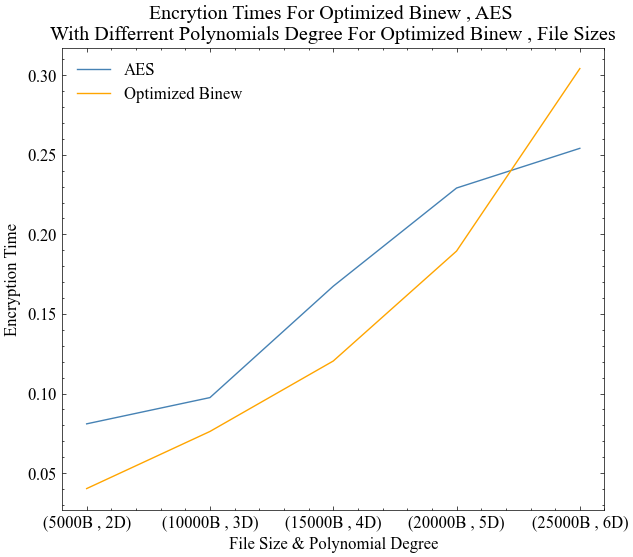

In [176]:
plt.figure(figsize= (7 , 6)) 
plt.plot(sizes_diff , aes_encrytpion , color= "steelblue" , label= "AES")  
plt.plot(sizes_diff , optimizedBinew_different_sizes_degrees_encrytpion , color= "orange" , label= "Optimized Binew")  
plt.xticks(sizes_diff, [f"({10 * size}B , {degree}D)" for size , degree in zip(sizes_diff,Degrees)]) 
plt.xlabel("File Size & Polynomial Degree") 
plt.ylabel("Encryption Time") 
plt.title("Encrytion Times For Optimized Binew , AES \nWith Differrent Polynomials Degree For Optimized Binew , File Sizes") 
plt.legend() 
plt.savefig(r"D:/مشروع التخرج/BiNew/Results/AES_OptimizedBinew_Differrent_Poly_Sizes_en.svg" , format= "svg")      
plt.show() 

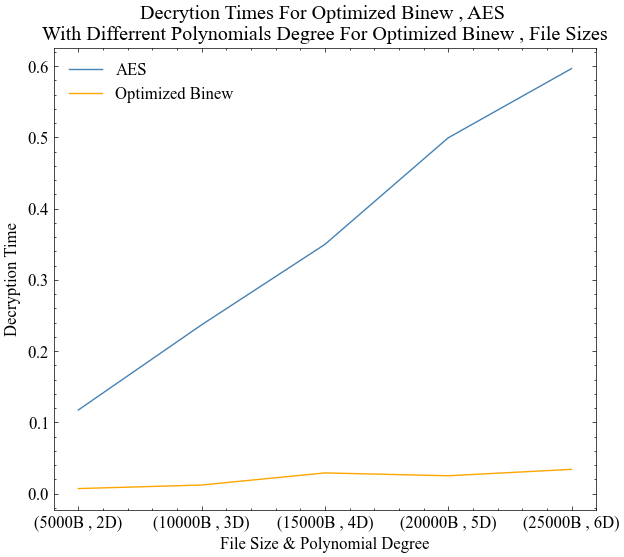

In [177]:
plt.figure(figsize= (7 , 6)) 
plt.plot(sizes_diff , aes_dencryption , color= "steelblue" , label= "AES")  
plt.plot(sizes_diff , optimizedBinew_sizes_degrees_dencryption , color= "orange" , label= "Optimized Binew")  
plt.xticks(sizes_diff, [f"({10 * size}B , {degree}D)" for size , degree in zip(sizes_diff,Degrees)]) 
plt.xlabel("File Size & Polynomial Degree") 
plt.ylabel("Decryption Time") 
plt.title("Decrytion Times For Optimized Binew , AES \nWith Differrent Polynomials Degree For Optimized Binew , File Sizes") 
plt.legend() 
plt.savefig(r"D:/مشروع التخرج/BiNew/Results/AES_OptimizedBinew_Differrent_Poly_Sizes_den.svg" , format= "svg")     
plt.show() 

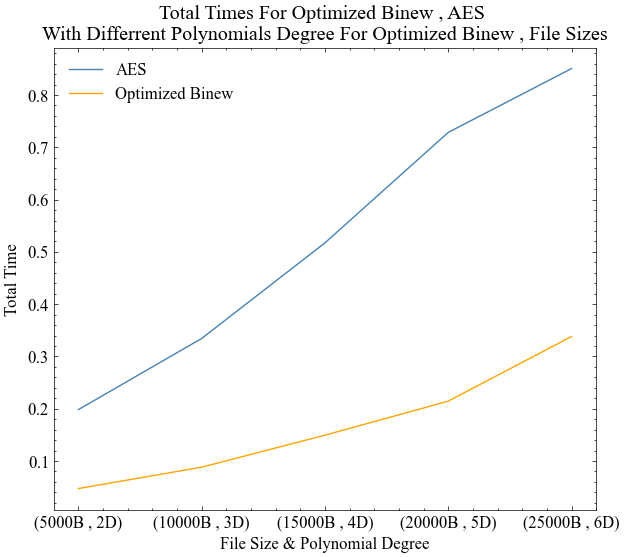

In [178]:
plt.figure(figsize= (7 , 6)) 
plt.plot(sizes_diff , aes_total , color= "steelblue" , label= "AES")  
plt.plot(sizes_diff , optimizedBinewt_sizes_degrees_total , color= "orange" , label= "Optimized Binew")  
plt.xticks(sizes_diff, [f"({10 * size}B , {degree}D)" for size , degree in zip(sizes_diff,Degrees)]) 
plt.xlabel("File Size & Polynomial Degree") 
plt.ylabel("Total Time") 
plt.title("Total Times For Optimized Binew , AES \nWith Differrent Polynomials Degree For Optimized Binew , File Sizes") 
plt.legend() 
plt.savefig(r"D:/مشروع التخرج/BiNew/Results/AES_OptimizedBinew_Differrent_Poly_Sizes_total.svg" , format= "svg")   
plt.show() 

# **For Optimized Binew Polynomial Degrees Can Be Within Range 1 : 6 Degree , Record The Results With Large Files Sizes When Using Middle Polynomial Degree Which Is Degree 4:** 

### Using Optimized Binew: 

In [142]:
for text in texts:
    print(polynomial) 
    obj= BiNew(text[0] , polynomial[0] , polynomial[1]) 
    binew_en_beg= time() 
    ciper_text= obj.encryption()  
    binew_en_end= time() 
    en_time= binew_en_end - binew_en_beg
    optimized_binew_encrytion_time.append(en_time)   
    
    binew_den_beg= time() 
    text_dencryption= obj.dencryption(ciper_text)   
    binew_den_end= time()  
    den_time= binew_den_end - binew_den_beg
    optimized_binew_dencrytion_time.append(den_time)  
    
    optimized_binew_total_time.append(en_time + den_time) 
    print(text_dencryption == text[0])   

([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True
([4, 4.5, 5, 5.5, 6], [-4, 4, 5, -5.5, -6])
True


### **Using AES:** 

In [143]:
for text in texts: 
    aes_en_beg= time() 
    key = b'sfisdfjslkdjfs'
    text_ = text[0].encode('utf-8') 
    padded_text = pkcs7_pad(text_)
    ciphertext = aes_encrypt(padded_text, key)
    aes_en_end= time() 
    en_time= aes_en_end - aes_en_beg  
    aes_encrytion_time.append(en_time)
    
    aes_den_beg= time()
    decrypted_text = pkcs7_unpad(aes_decrypt(ciphertext, key))
    aes_den_end= time() 
    den_time= aes_den_end - aes_den_beg
    aes_dencrytion_time.append(den_time)
    
    aes_total_time.append(en_time +  den_time)     

### **Record The Results:**

In [144]:
AES_OptimizedBinew_Final_Results= pd.DataFrame() 

In [145]:
en_times= [ ]
for aes_en_time , optimizedBinew_en_time in zip(aes_encrytion_time , 
                                              optimized_binew_encrytion_time): 
    en_times.append(aes_en_time)
    en_times.append(optimizedBinew_en_time) 

In [146]:
den_times= [ ]
for aes_den_time , optimizedBinew_den_time in zip(aes_dencrytion_time , 
                                              optimized_binew_dencrytion_time): 
    den_times.append(aes_den_time)
    den_times.append(optimizedBinew_den_time) 

In [147]:
total_times= [ ]
for aes_tot_time , optimizedBinew_total_time in zip(aes_total_time , 
                                              optimized_binew_total_time): 
    total_times.append(aes_tot_time)
    total_times.append(optimizedBinew_total_time)  

In [148]:
names= [ ] 
key_size_ploy_degree= [ ] 
text_size= [ ] 
for size in sizes: 
    text_size.extend([10 * size , 10 * size]) 
    names.extend(["AES" , "Optimized Binew"]) 
    key_size_ploy_degree.extend([128 , "4D"])  

In [149]:
AES_OptimizedBinew_Final_Results["Encrytion Algorithm"]= names 
AES_OptimizedBinew_Final_Results["File Size"]= text_size
AES_OptimizedBinew_Final_Results["Key Size & Polynomial Degree"]= key_size_ploy_degree
AES_OptimizedBinew_Final_Results["Encrytion Time"]= en_times
AES_OptimizedBinew_Final_Results["Dencrytion Time"]= den_times
AES_OptimizedBinew_Final_Results["Total Time"]= total_times

In [150]:
AES_OptimizedBinew_Final_Results

,Encrytion Algorithm,File Size,Key Size & Polynomial Degree,Encrytion Time,Dencrytion Time,Total Time
0,AES,5000,128,0.140923,0.299820,0.440742
1,Optimized Binew,5000,4D,0.172813,0.015990,0.188803
2,AES,10000,128,0.233275,0.597393,0.830668
3,Optimized Binew,10000,4D,0.267852,0.029980,0.297832
4,AES,15000,128,0.343792,0.876013,1.219804
5,Optimized Binew,15000,4D,0.402596,0.047483,0.450079
6,AES,20000,128,0.457496,1.236999,1.694495
7,Optimized Binew,20000,4D,0.533459,0.062968,0.596427
8,AES,25000,128,0.631025,1.444472,2.075497
9,Optimized Binew,25000,4D,0.670522,0.076950,0.747472


In [151]:
AES_OptimizedBinew_Final_Results.to_csv(r"D:/مشروع التخرج/BiNew/Results/AES_OptimizedBinew_Final_Results.csv") 

### **Plot The Results:** 

In [152]:
sizes= [10 * i for i in sizes]

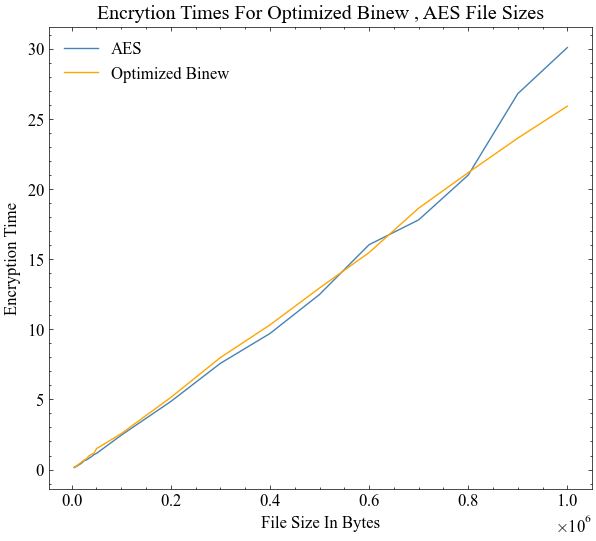

In [179]:
plt.figure(figsize= (7 , 6)) 
plt.plot(sizes , aes_encrytion_time , color= "steelblue" , label= "AES")  
plt.plot(sizes , optimized_binew_encrytion_time , color= "orange" , label= "Optimized Binew")  
plt.xlabel("File Size In Bytes") 
plt.ylabel("Encryption Time") 
plt.title("Encrytion Times For Optimized Binew , AES File Sizes")  
plt.legend() 
plt.savefig(r"D:/مشروع التخرج/BiNew/Results/AES_OptimizedBinew_Final_Results_en.svg" , format= "svg")  
plt.show()

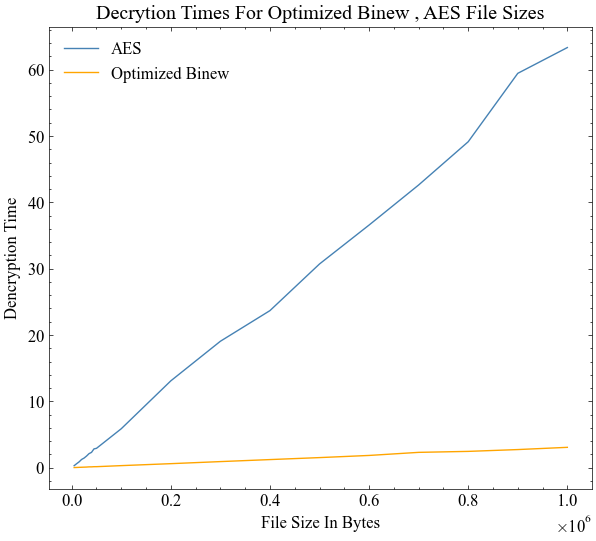

In [180]:
plt.figure(figsize= (7 , 6)) 
plt.plot(sizes , aes_dencrytion_time , color= "steelblue" , label= "AES")  
plt.plot(sizes , optimized_binew_dencrytion_time , color= "orange" , label= "Optimized Binew")  
plt.xlabel("File Size In Bytes") 
plt.ylabel("Dencryption Time") 
plt.title("Decrytion Times For Optimized Binew , AES File Sizes") 
plt.legend() 
plt.savefig(r"D:/مشروع التخرج/BiNew/Results/AES_OptimizedBinew_Final_Results_den.svg" , format= "svg")  
plt.show() 

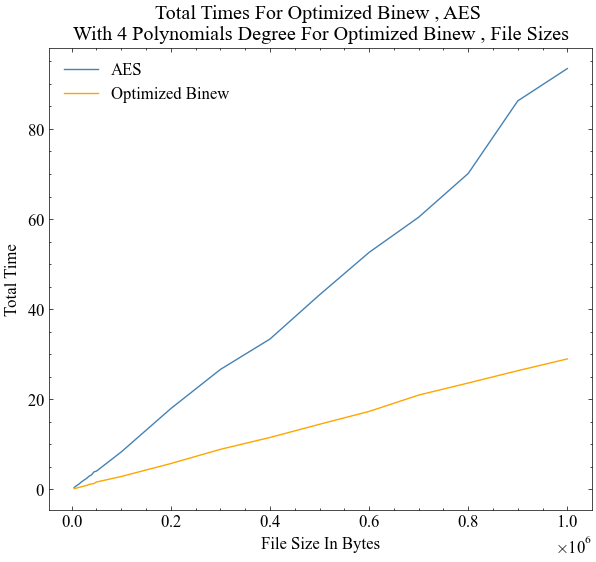

In [181]:
plt.figure(figsize= (7 , 6)) 
plt.plot(sizes , aes_total_time , color= "steelblue" , label= "AES")  
plt.plot(sizes , optimized_binew_total_time , color= "orange" , label= "Optimized Binew")  
plt.xlabel("File Size In Bytes") 
plt.ylabel("Total Time") 
plt.title("Total Times For Optimized Binew , AES \nWith 4 Polynomials Degree For Optimized Binew , File Sizes") 
plt.legend() 
plt.savefig(r"D:/مشروع التخرج/BiNew/Results/AES_OptimizedBinew_Final_Results_total.svg" , format= "svg")  
plt.show()     